# FISH - Pipeline - A Python notebook to simulate FISH data

```
Author: Luis U. Aguilera
Contact Info: luis.aguilera@colostate.edu

Copyright (c) 2021 Munsky Group 
Colorado State University 
Licensed under BSD 3-Clause License.
```

### Libraries

In [1]:
# Importing libraries
import sys
import pathlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

### Path to source directories

In [2]:
# Defining directories
current_dir = pathlib.Path().absolute()
fa_dir = current_dir.parents[0].joinpath('src')
# Importing fish_analyses module
sys.path.append(str(fa_dir))
import fish_analyses as fa


In [3]:
# initializing Microscope simulation 
cell_library_folder_path = current_dir.joinpath('cell_library')
list_library_cells, dataframe_cell_library, background_pixels_library = fa.MicroscopeSimulation().initialize(cell_library_folder_path)

___

# Function to simulate cell positions

In [4]:
image_size_Y_X = [5000,5000]
number_of_cells_in_simulation = 150
simulation_dataframe,complete_image_size_Z_Y_X = fa.MicroscopeSimulation().generate_simulated_positions(image_size_Y_X,number_of_cells_in_simulation,list_library_cells,dataframe_cell_library)
simulation_dataframe.tail()

,start_y_position,start_x_position,centroid_y,centroid_x,z_size,y_size,x_size,nucleus_area,number_of_spots,ts_size_0,ts_size_1,ts_size_2,ts_size_3,library_id
145,1437,1552,1478,1591,27,83,78,4834,180,29,0,0,0,43
146,3395,4382,3445,4424,27,100,84,6188,380,56,0,0,0,40
147,2473,2742,2505,2788,27,65,93,4645,274,50,0,0,0,7
148,3132,4221,3173,4277,27,82,112,5902,180,50,0,0,0,32
149,999,3740,1043,3783,27,88,86,5387,380,57,0,0,0,80


# Generate simulation on demand

z-position:  5


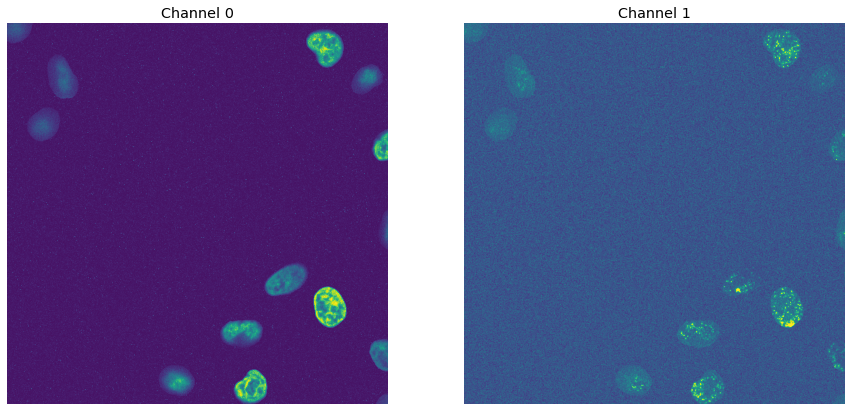

In [7]:
# Region to display
z_position = 5 #[-13:13]
y_position =  600
x_position = 600
x_size = 960
y_size = 960
simulated_image,dataframe_cells_in_image = fa.MicroscopeSimulation().make_simulated_image(z_position, y_position, x_position, x_size, y_size, complete_image_size_Z_Y_X, simulation_dataframe, list_library_cells, background_pixels_library)
# Plotting
number_color_channels = simulated_image.shape[2]
fig, ax = plt.subplots(1,number_color_channels, figsize=(15, 7))
# Plotting the heatmap of a section in the image
print('z-position: ', str(z_position))
for i in range (number_color_channels):
    #simulated_image_removed_extreme_values = simulated_image[:,:,i]#fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)
    simulated_image_removed_extreme_values = fa.RemoveExtrema(simulated_image[:,:,i],min_percentile=0, max_percentile=99.9).remove_outliers()  #np.max(simulated_image[:,:,:,i],axis = 0)

    ax[i].imshow(simulated_image_removed_extreme_values);ax[i].set(title='Channel '+ str(i)); ax[i].axis('off');ax[i].grid(False)
    #print('mean int ch: ',str(i),' ' , np.mean(simulated_image_removed_extreme_values))
plt.show()


## Image Processing


 ###################### 
        IMAGE : 0
 ###################### 
    Image Name :   temp.tif


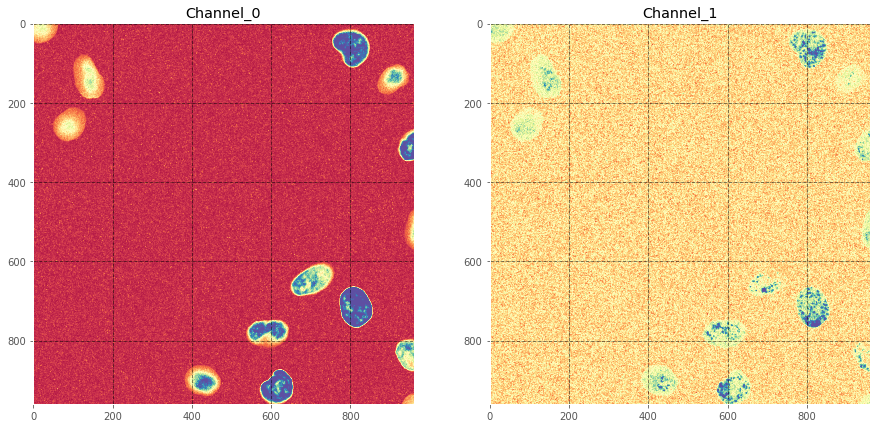

    Original Image Shape :                    [1, 960, 960, 2]
    Image sharpness metric :                  1.206
    Number of detected cells:                 12


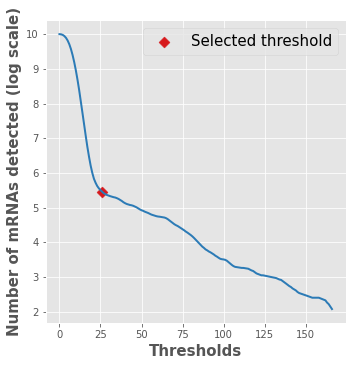

Z-Slice:  0


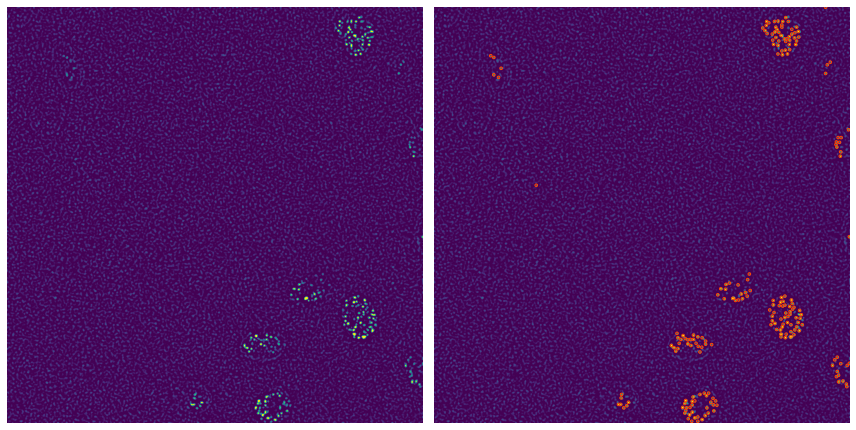

    Intensity threshold for spot detection :  [26.0]
    Average detected spots per cell :         [15]
    Maximum detected spots per cell :         [45]


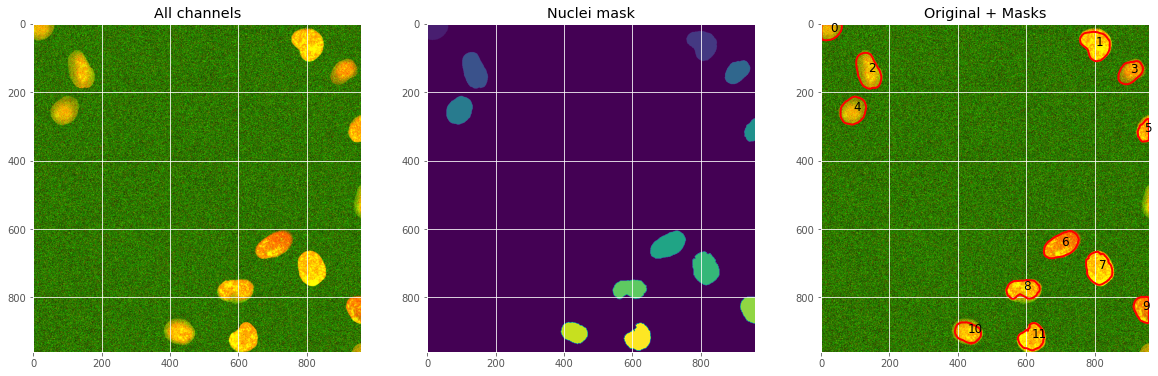

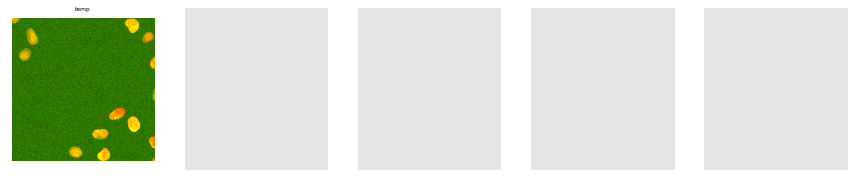

In [8]:
# Pipeline for image processing
dataframe = fa.PipelineFISH(
            image=simulated_image,
            channels_with_cytosol=None, 
            channels_with_nucleus=[0], 
            channels_with_FISH=[1],
            diameter_nucleus=60, 
            diameter_cytosol=0, 
            voxel_size_z=500,
            voxel_size_yx=130,
            file_name_str ='temp',
            psf_z=500,
            psf_yx=300,  
            show_plots=True,
            save_files=True,
            ).run()[0]

In [9]:
dataframe

,image_id,cell_id,spot_id,nuc_loc_y,nuc_loc_x,cyto_loc_y,cyto_loc_x,nuc_area_px,cyto_area_px,cell_area_px,...,cyto_int_ch_0,cyto_int_ch_1,pseudo_cyto_int_ch_0,pseudo_cyto_int_ch_1,nuc_cyto_int_ratio_ch_0,nuc_cyto_int_ratio_ch_1,nuc_pseudo_cyto_int_ratio_ch_0,nuc_pseudo_cyto_int_ratio_ch_1,spot_int_ch_0,spot_int_ch_1
0,0,0,-1,21,27,0,0,2606,0,0,...,0.0,0.0,594.01359,770.58696,0.0,0.0,1.729326,1.166633,0.0,0.0
1,0,1,0,62,804,0,0,5461,0,0,...,0.0,0.0,1161.83877,928.22192,0.0,0.0,2.039803,1.211108,-145.8,-257.5333
2,0,1,1,62,804,0,0,5461,0,0,...,0.0,0.0,1161.83877,928.22192,0.0,0.0,2.039803,1.211108,-546.2667,1074.0667
3,0,1,2,62,804,0,0,5461,0,0,...,0.0,0.0,1161.83877,928.22192,0.0,0.0,2.039803,1.211108,-294.0667,361.2667
4,0,1,3,62,804,0,0,5461,0,0,...,0.0,0.0,1161.83877,928.22192,0.0,0.0,2.039803,1.211108,-291.7333,1700.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0,11,21,917,616,0,0,4308,0,0,...,0.0,0.0,1619.63672,965.95163,0.0,0.0,1.571764,1.107562,501.6,621.9333
186,0,11,22,917,616,0,0,4308,0,0,...,0.0,0.0,1619.63672,965.95163,0.0,0.0,1.571764,1.107562,-558.7333,124.7333
187,0,11,23,917,616,0,0,4308,0,0,...,0.0,0.0,1619.63672,965.95163,0.0,0.0,1.571764,1.107562,363.6667,1550.3333
188,0,11,24,917,616,0,0,4308,0,0,...,0.0,0.0,1619.63672,965.95163,0.0,0.0,1.571764,1.107562,-252.6,-122.2667
